## Teste de hipótese

### Bibliotecas

In [3]:
import numpy as np
import math
from scipy.stats import norm

### Base de Dados

In [2]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                            140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                            147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                            150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                            154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                            157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                            161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                            164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                            168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                            171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                            178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189. , 192.5])

In [3]:
len(dados_originais)

100

In [4]:
H0_media = np.mean(dados_originais)
H0_media

159.25

In [5]:
H0_desvio_padrao = np.std(dados_originais)
H0_desvio_padrao

13.65

### Teste de hipótese

In [6]:
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [7]:
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [8]:
H1_desvio_padrao = np.std(dados_novos)
H1_desvio_padrao

14.0595

In [9]:
H1_n = len(dados_novos)

In [10]:
alpha = 0.05

#### Teste manual

In [11]:
Z = (H1_media - H0_media) / ((H1_desvio_padrao) / np.sqrt(H1_n))
Z

3.398058252427187

In [12]:
norm.cdf(Z)

0.9996606701617486

In [13]:
p = 1 - norm.cdf(Z)
p

0.00033932983825135654

In [14]:
if p < alpha:
    print('Hipotese nula rejeitada')
else:
    print('Hipotese alternativa rejeitada')

Hipotese nula rejeitada


#### Teste com o statsmodels

In [15]:
from statsmodels.stats.weightstats import ztest

In [16]:
_, p = ztest(dados_originais, dados_novos, value = H1_media - H0_media, alternative='larger')

In [17]:
p

0.9999993877283934

In [18]:
p = 1 - norm.cdf(Z)
p

0.00033932983825135654

In [19]:
if p < alpha:
    print('Hipotese nula rejeitada')
else:
    print('Hipotese alternativa rejeitada')

Hipotese nula rejeitada


### Qui Quadrado

In [20]:
from scipy.stats import chi2_contingency

In [21]:
tabela = np.array([[30,20], [22,28]])

In [22]:
tabela

array([[30, 20],
       [22, 28]])

In [26]:
_, p, _, _ = chi2_contingency(tabela)

In [28]:
p

0.16117778944980238

In [29]:
if p < alpha:
    print('Hipotese nula rejeitada')
else:
    print('Hipotese alternativa rejeitada')

Hipotese alternativa rejeitada


## Seleção de atributos com testes de hipóteses - SelectFdr

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFdr, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
df = pd.read_csv('../../dados/ad.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [25]:
df.shape

(3279, 1559)

In [26]:
df[1558].unique()

array(['ad.', 'nonad.'], dtype=object)

In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
X

array([[125.    , 125.    ,   1.    , ...,   0.    ,   0.    ,   0.    ],
       [ 57.    , 468.    ,   8.2105, ...,   0.    ,   0.    ,   0.    ],
       [ 33.    , 230.    ,   6.9696, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [ 23.    , 120.    ,   5.2173, ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [ 40.    ,  40.    ,   1.    , ...,   0.    ,   0.    ,   0.    ]])

In [29]:
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

In [30]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820], dtype=int64))

In [34]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

0.7813357731015553

In [35]:
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)

In [36]:
X.shape, X_novo.shape

((3279, 1558), (3279, 433))

In [37]:
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]),
 1558)

In [38]:
np.sum(selecao.pvalues_ <= 0.01)

476

In [39]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [40]:
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [41]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(y, previsoes2)

0.970722781335773

### ANOVA

In [4]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [5]:
from scipy.stats import f

In [6]:
f.ppf(1-0.05, dfn=2, dfd=12)

3.8852938346523933

In [7]:
from scipy.stats import f_oneway

In [8]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

### Teste de Tukey

In [14]:
import pandas as pd

In [10]:
dados = {'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'grupo'  : ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

In [15]:
df = pd.DataFrame(dados)
df

,valores,grupo
0,165,A
1,152,A
2,143,A
3,140,A
4,155,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [16]:
from statsmodels.stats.multicomp import MultiComparison

In [18]:
compara_grupos = MultiComparison(df['valores'], df['grupo'])

In [20]:
teste = compara_grupos.tukeyhsd()
print(teste)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      1.0 0.9891 -17.9023 19.9023  False
     A      C      5.0 0.7648 -13.9023 23.9023  False
     B      C      4.0 0.8411 -14.9023 22.9023  False
-----------------------------------------------------


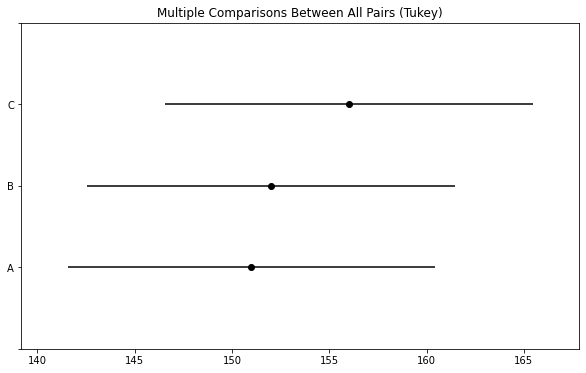

In [22]:
teste.plot_simultaneous();

### Seleção de atributos com ANOVA

In [31]:
from sklearn.feature_selection import f_classif

In [43]:
selecao = SelectFdr(f_classif, alpha=0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [44]:
X.shape, X_novo.shape, X_novo_2.shape

((3279, 1558), (3279, 433), (3279, 433))

In [45]:
selecao.pvalues_

array([1.31095977e-005, 1.19510994e-200, 4.91337302e-016, ...,
       1.35872010e-042, 3.77636040e-012, 9.35989125e-002])

In [46]:
np.sum(selecao.pvalues_ < 0.01)

476

In [47]:
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)

GaussianNB()

In [48]:
previsoes_3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes_3)

0.970722781335773

### Resultados dos algoritmos de machine learning

In [49]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [50]:
df = pd.read_csv('../../dados/credit_data.csv')
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [52]:
X = df.iloc[:, 1:4].values

In [53]:
y = df.iloc[:, 4].values

In [55]:
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [58]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_cv.append(scores.mean())
    
    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv.append(scores.mean())
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [59]:
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249859296482411, 0.9457008375209381, 0.9868804020100501)

### Teste de hipótese de Shapiro-Wilk

In [60]:
alpha = 0.05

In [61]:
from scipy.stats import shapiro

In [62]:
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

(ShapiroResult(statistic=0.9646671414375305, pvalue=0.4051830470561981),
 ShapiroResult(statistic=0.9463143944740295, pvalue=0.13459184765815735),
 ShapiroResult(statistic=0.9554842710494995, pvalue=0.23648448288440704))

In [63]:
import seaborn as sns

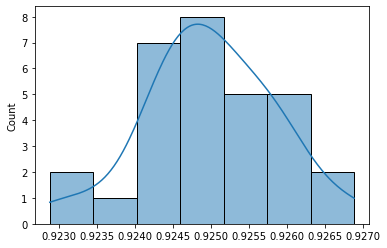

In [77]:
sns.histplot(resultados_naive_cv, kde=True);

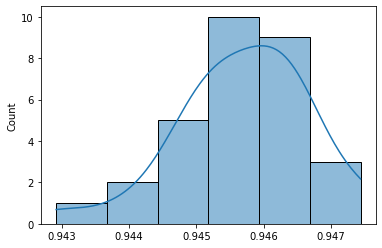

In [76]:
sns.histplot(resultados_logistica_cv, kde=True);

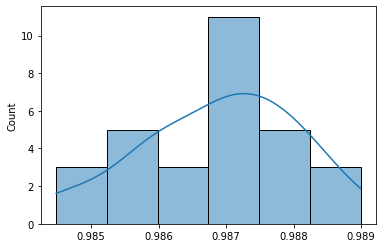

In [75]:
sns.histplot(resultados_forest_cv, kde=True);

### Teste de hipótese de D'AgostinhoK^2

In [71]:
from scipy.stats import normaltest

In [72]:
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=1.0061569456297585, pvalue=0.6046663426623394))

### Teste de hipótese de Anderson-Darling

In [73]:
from scipy.stats import anderson

In [74]:
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

(0.5456346672421084, 0.6048933015735969, 0.5397621559235724)

### Testes não paramétricos

### Teste de Wilcoxon Signed-Rank

In [78]:
from scipy.stats import wilcoxon

In [79]:
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

1.7333066441991056e-06

In [80]:
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

1.7343976283205784e-06

In [81]:
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

1.7343976283205784e-06

### Teste de Friedman

In [82]:
from scipy.stats import friedmanchisquare

In [83]:
_, p = friedmanchisquare(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)

In [84]:
p

9.357622968840163e-14

### Exercicio ANOVA

In [86]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [87]:
_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv)

In [88]:
p

8.722257763144029e-124

In [89]:
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes
